In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_toLoad = "data/mouse_drug_data.csv"
clinical_toLoad = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_toLoad)
clinical = pd.read_csv(clinical_toLoad)

# Combine the data into a single dataset
trials = pd.merge(mouse, clinical, on = "Mouse ID", how = "inner")

# Display the data table for preview
trials.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
trialsGroups = trials.groupby(["Drug", "Timepoint"])
tumorMeans = trialsGroups["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumorMeans = pd.DataFrame(tumorMeans)

# Preview DataFrame
tumorMeans = tumorMeans.reset_index()
tumorMeans.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorErrors = trialsGroups["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumorErrors = pd.DataFrame(tumorErrors)

# Preview DataFrame
tumorErrors = tumorErrors.reset_index()
tumorErrors.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumorMeans = tumorMeans.pivot(index = "Timepoint",
                             columns = "Drug",
                             values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
tumorMeans.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


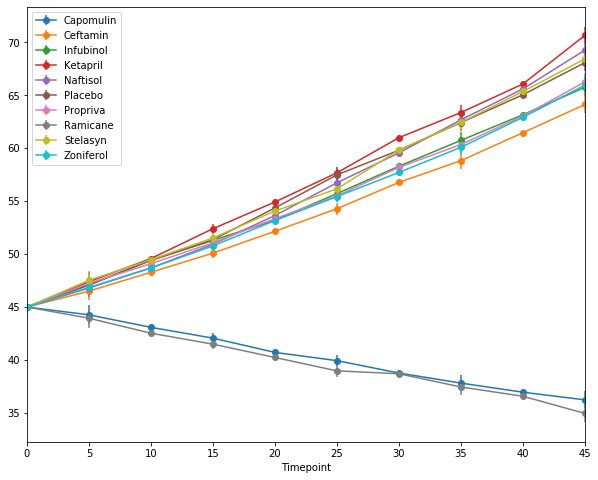

In [29]:
# Generate the Plot (with Error Bars)
tumorMeans.plot(xticks = tumorMeans.index,
                marker = "o",
                figsize = (10,8),
                yerr = tumorErrors["Tumor Volume (mm3)"],
                )
plt.legend(loc = "upper left",
           prop={'size': 10})

# Save the Figure